<a href="https://colab.research.google.com/github/Habib-103/Bi-Variate-Analysis/blob/main/new_melbourne_postcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import itertools
from sklearn.metrics import silhouette_score as shs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [4]:
df = pd.read_csv("Melbourne_housing.csv")
df.head()


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [6]:
df.drop(["Address", "Method", "SellerG", "Date", "Suburb"], axis=1, inplace=True)

In [7]:
df.shape

(27041, 17)

In [8]:
df.isna().sum()

,0
Rooms,0
Type,0
Distance,1
Postcode,1
Bedroom,6314
Bathroom,6321
Car,6745
Landsize,9136
BuildingArea,16353
YearBuilt,15011


In [9]:
df[['Car', 'Bathroom', 'Bedroom', 'Distance', 'Propertycount']] = df[['Car', 'Bathroom', 'Bedroom', 'Distance', 'Propertycount']].fillna(0)

In [10]:
df.dtypes

,0
Rooms,int64
Type,object
Distance,float64
Postcode,float64
Bedroom,float64
Bathroom,float64
Car,float64
Landsize,float64
BuildingArea,object
YearBuilt,float64


In [11]:
df.isna().sum()

,0
Rooms,0
Type,0
Distance,0
Postcode,1
Bedroom,0
Bathroom,0
Car,0
Landsize,9136
BuildingArea,16353
YearBuilt,15011


In [12]:
df['Landsize'].fillna(df['Landsize'].mean(), inplace=True)

<ipython-input-12-342f601ebd1c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Landsize'].fillna(df['Landsize'].mean(), inplace=True)


In [13]:
df['BuildingArea'] = pd.to_numeric(df['BuildingArea'], errors='coerce')
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [14]:
df['CouncilArea'].fillna(method ="bfill", inplace=True)

<ipython-input-14-3ac41015528c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CouncilArea'].fillna(method ="bfill", inplace=True)
<ipython-input-14-3ac41015528c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CouncilArea'].fillna(method ="bfill", inplace=True)


In [15]:
df['Postcode'].fillna(method ="bfill", inplace=True)

<ipython-input-15-f5ad68e3a907>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postcode'].fillna(method ="bfill", inplace=True)
<ipython-input-15-f5ad68e3a907>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Postcode'].fillna(method ="bfill", inplace=True)


In [16]:
df['Postcode'] = df['Postcode'].astype(str)
df['Postcode']

,Postcode
0,3067.0
1,3042.0
2,3206.0
3,3206.0
4,3078.0
...,...
27036,3088.0
27037,3088.0
27038,3059.0
27039,3059.0


In [17]:
df.isna().sum()

,0
Rooms,0
Type,0
Distance,0
Postcode,0
Bedroom,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,15011


In [18]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df.isna().sum()

,0
Rooms,0
Type,0
Distance,0
Postcode,0
Bedroom,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0


In [19]:
df.shape

(7943, 17)

In [20]:
df['price'] = df['Price']/df['Landsize']
df.drop('Price', axis=1, inplace=True)

In [21]:
#postcode to categorical
df['Postcode'] = df['Postcode'].astype(str)

In [22]:
df.dtypes

,0
Rooms,int64
Type,object
Distance,float64
Postcode,object
Bedroom,float64
Bathroom,float64
Car,float64
Landsize,float64
BuildingArea,float64
YearBuilt,float64


In [23]:
df1 = pd.get_dummies(df, drop_first=True)

In [24]:
df1.shape

(7943, 256)

In [25]:
df1.iloc[:0, :16].columns

Index(['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount',
       'price', 'Type_t', 'Type_u', 'Postcode_3002.0', 'Postcode_3003.0'],
      dtype='object')

In [26]:
outlier_columns = ['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longtitude',
       'Propertycount', 'price']

In [27]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [28]:
# Remove outliers from the specified columns
cleaned_df = remove_outliers(df1, outlier_columns)

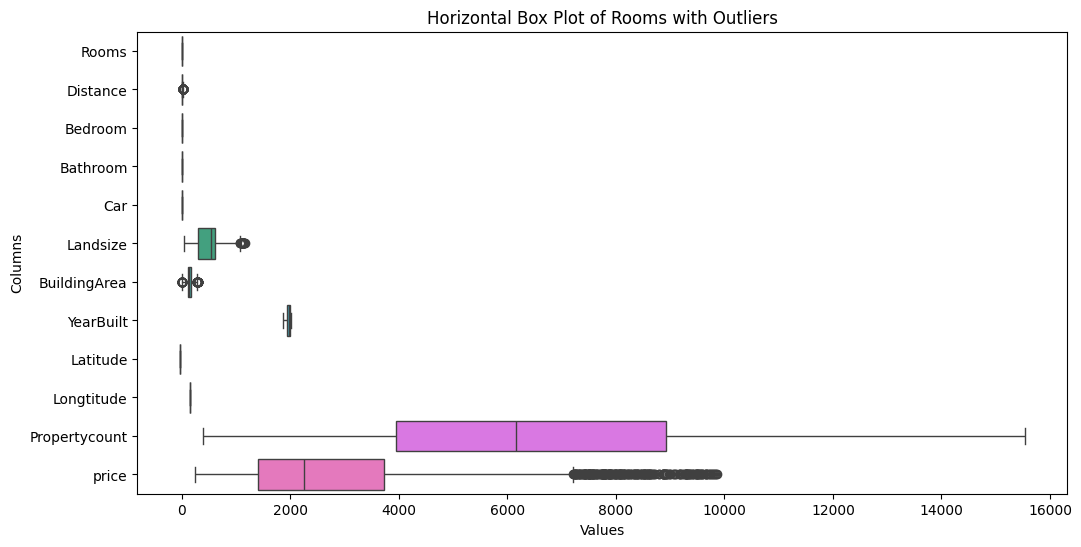

In [29]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df[outlier_columns], orient='h')
plt.title("Horizontal Box Plot of Rooms with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [30]:
def draw_all_distributions(df):
    numerical_cols = df.select_dtypes(include=['number']).columns

    for column in numerical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size if needed

        # Use Pandas plotting functionalities
        df[column].plot(kind='hist', bins=20, edgecolor='black')
        #df[column].plot(kind='kde')  # Alternative: Kernel Density Estimate plot

        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.tight_layout()
        plt.show()

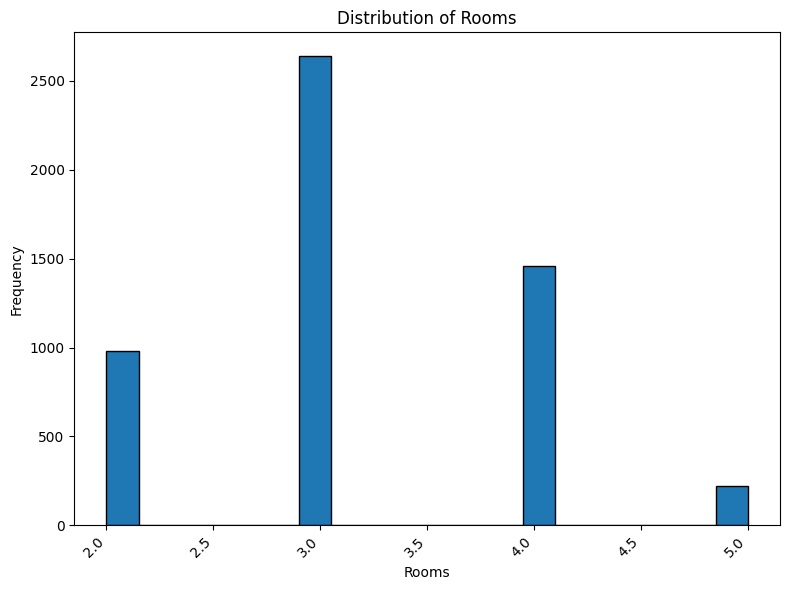

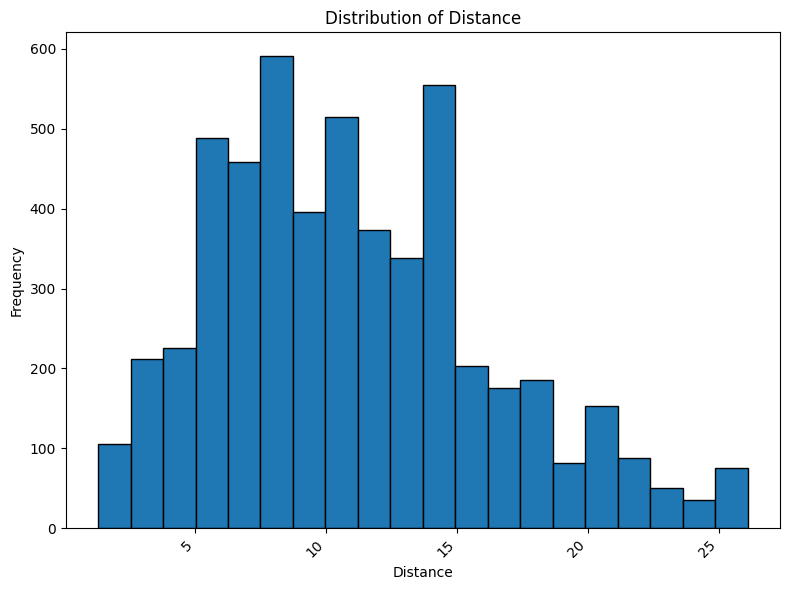

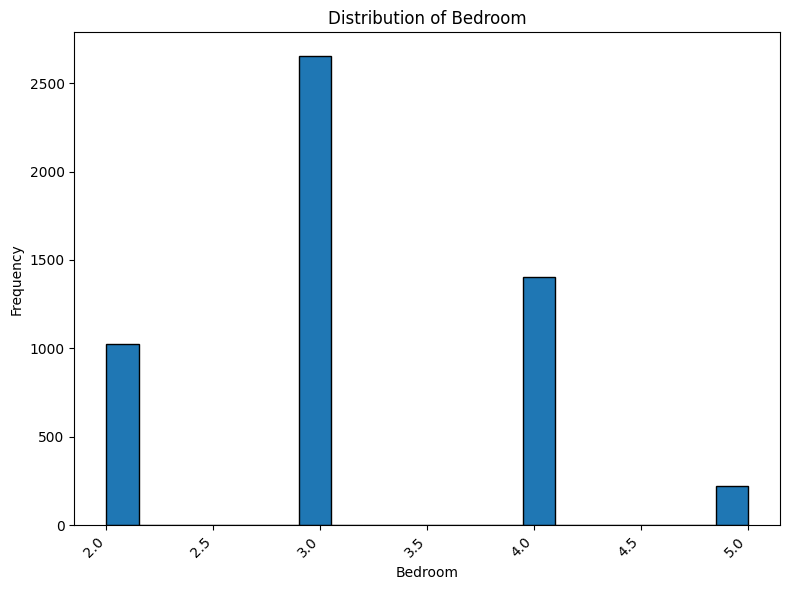

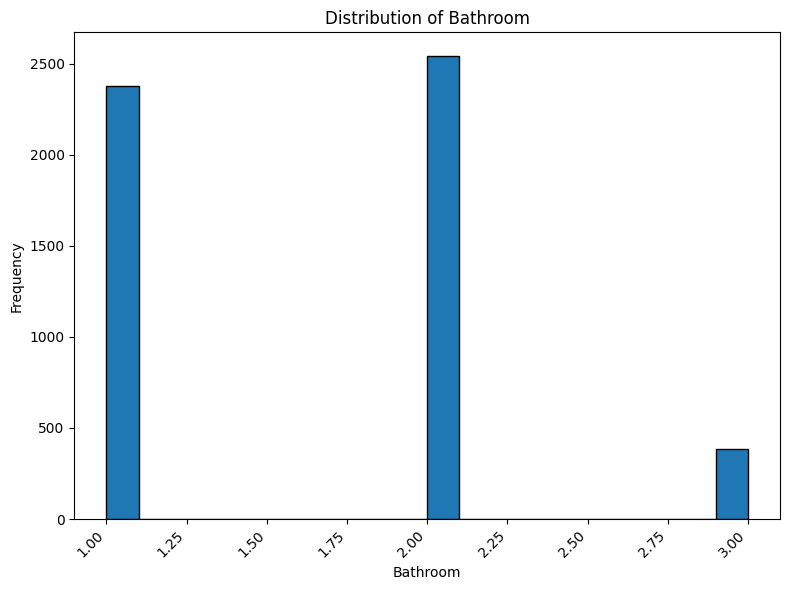

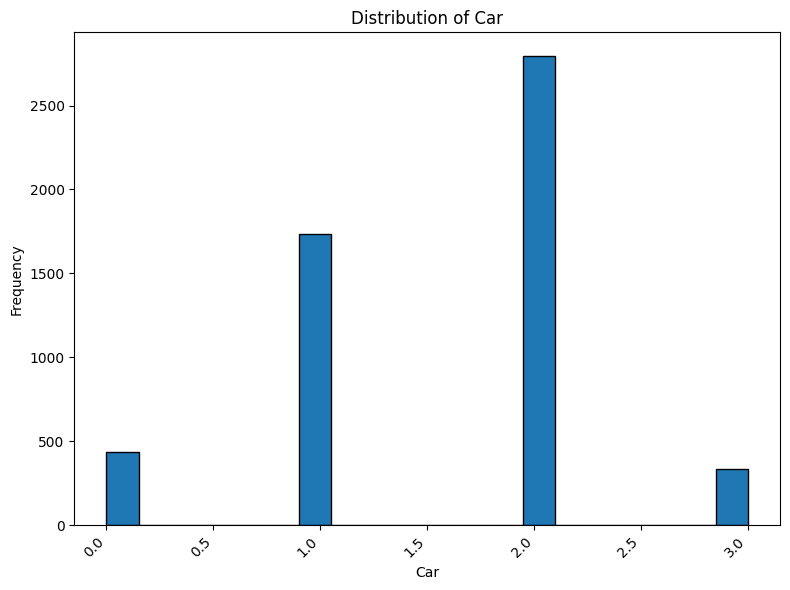

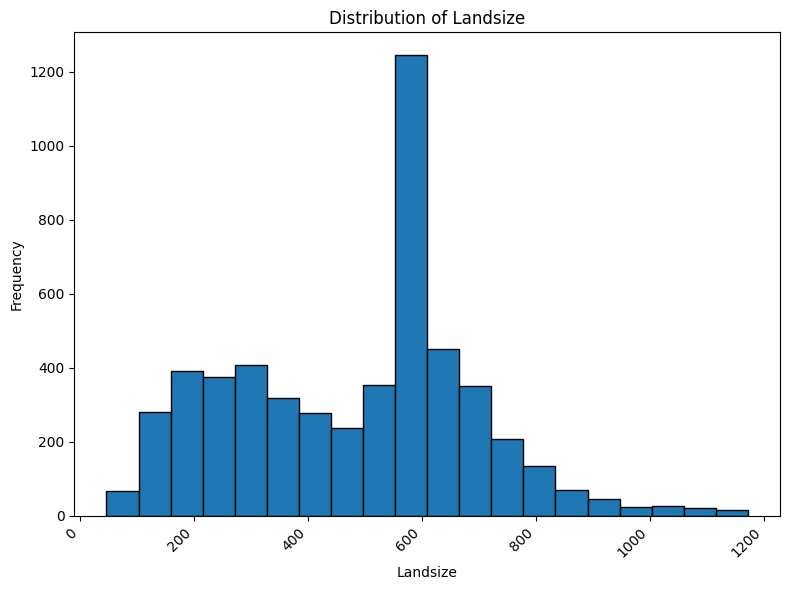

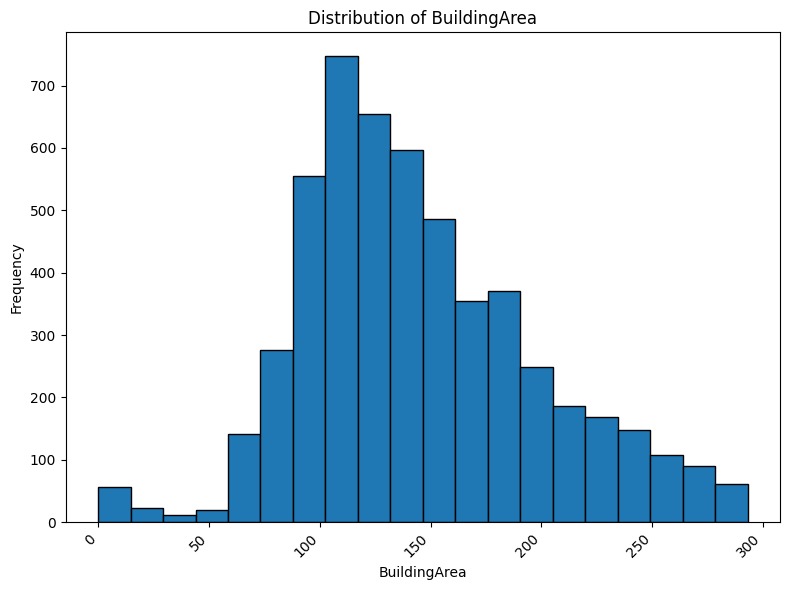

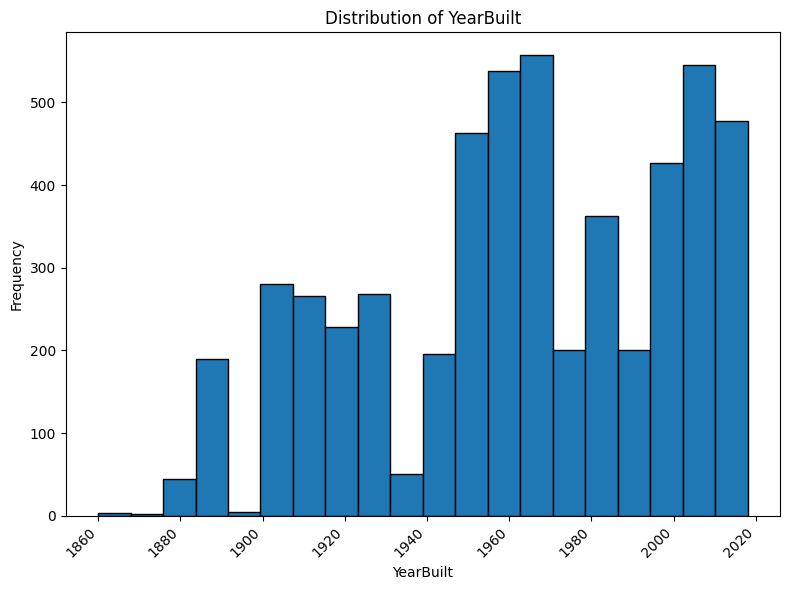

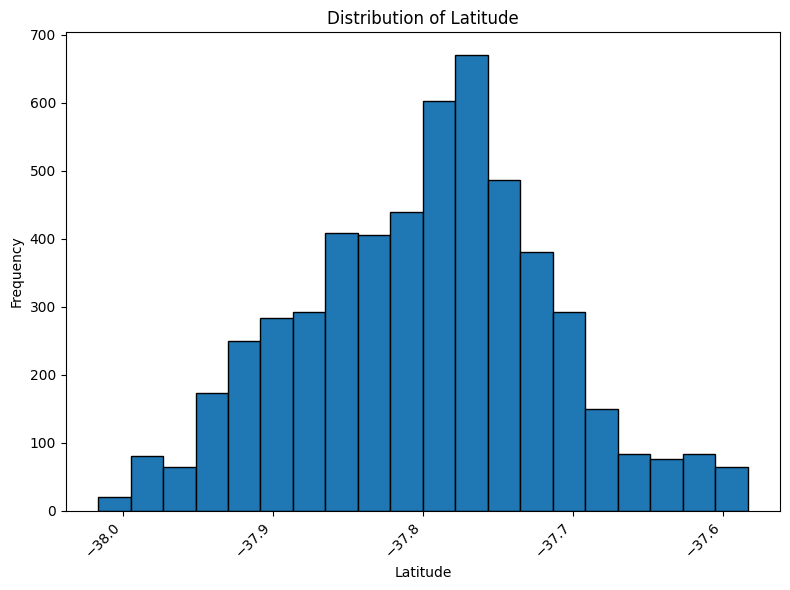

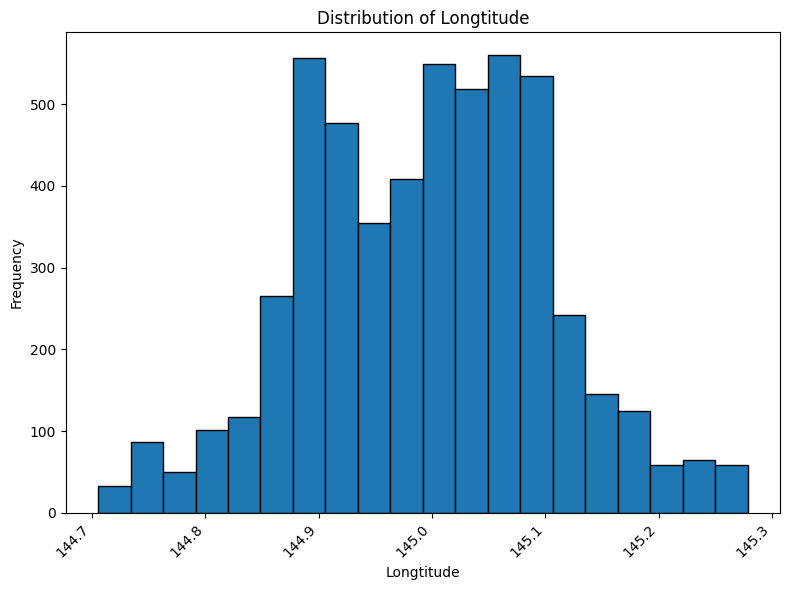

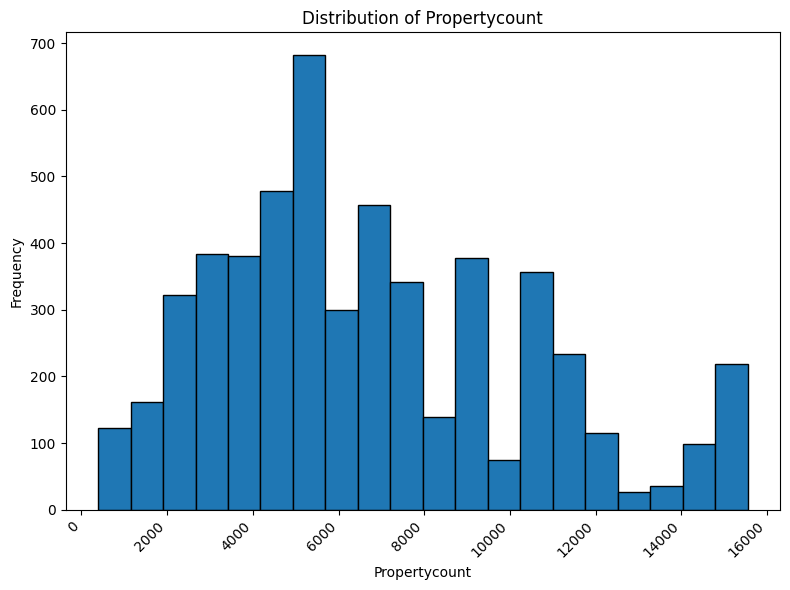

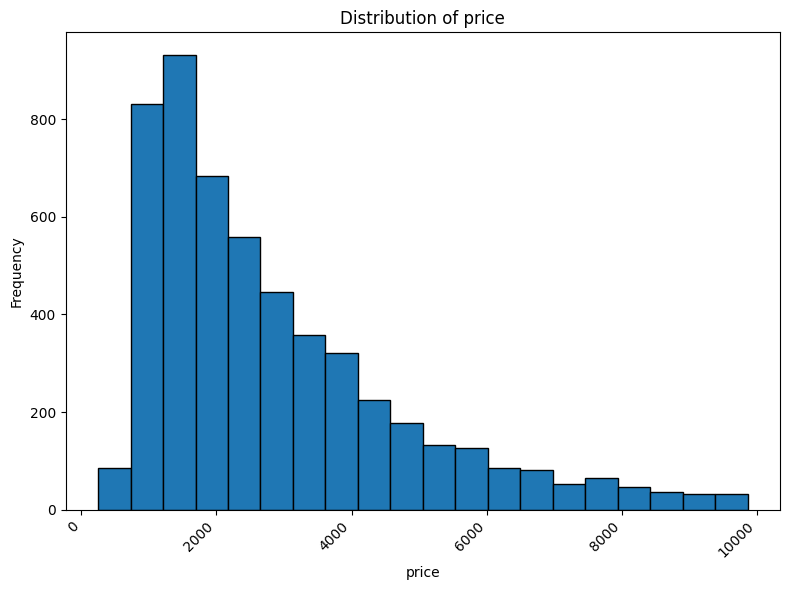

In [31]:
draw_all_distributions(cleaned_df[outlier_columns])

In [32]:
df.shape

(7943, 17)

In [33]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < threshold)]
    return df

In [34]:
df_z = remove_outliers_zscore(cleaned_df, outlier_columns)
df_z.shape

(5206, 256)

In [35]:
cleaned_df.shape

(5305, 256)

In [36]:
6809-6672

137

In [37]:
cleaned_df= df_z

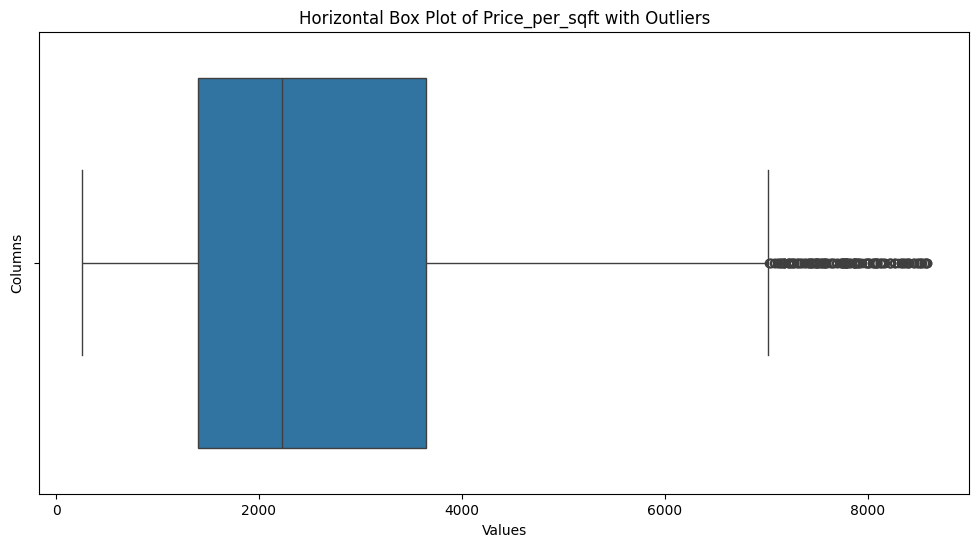

In [38]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df["price"], orient='h')
plt.title("Horizontal Box Plot of Price_per_sqft with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

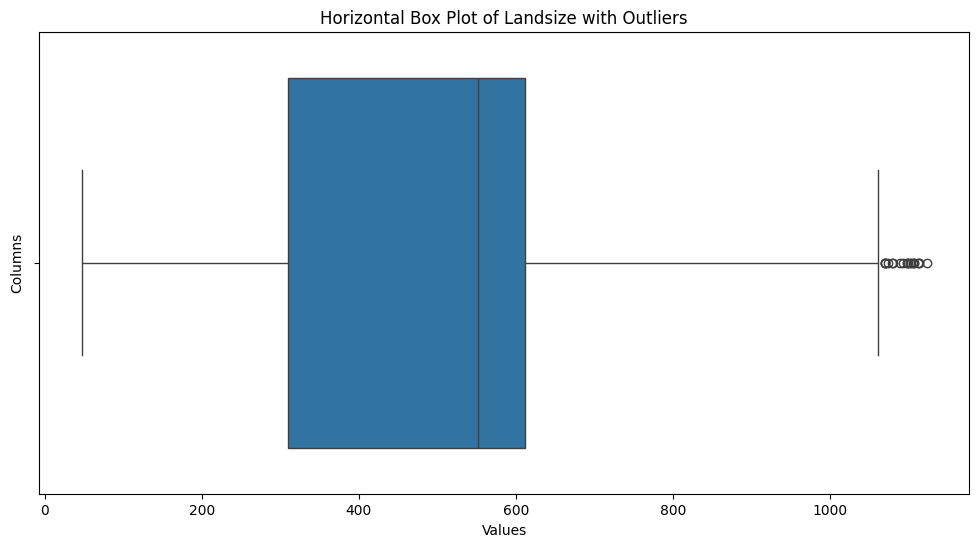

In [39]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df["Landsize"], orient='h')
plt.title("Horizontal Box Plot of Landsize with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [40]:
scaler = StandardScaler()
scaler1 = scaler.fit_transform(cleaned_df)
df1 = pd.DataFrame(scaler1, columns=cleaned_df.columns)
df1

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground
0,-0.237280,0.452691,-0.211655,0.610026,-0.807115,-0.900586,1.495003,1.431668,0.955008,-1.088644,...,-0.605906,1.691750,0.0,-0.471847,2.194712,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
1,-0.237280,0.509990,-0.211655,0.610026,-0.807115,-0.664328,1.812567,1.404430,-0.861297,-1.577720,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,5.907914,-0.28457
2,-0.237280,-0.005698,-0.211655,-1.014422,0.572347,0.208380,-0.522463,0.178694,-0.372568,-1.485441,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
3,-0.237280,-0.120295,-0.211655,-1.014422,-0.807115,0.497675,-0.503782,0.178694,0.361124,-1.186459,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
4,1.058923,-0.865177,-0.211655,0.610026,-0.807115,-1.185059,0.654393,-1.728007,-0.823059,-0.029286,...,1.650422,-0.591104,0.0,-0.471847,-0.455641,-0.438318,-0.254636,2.562589,-0.169264,-0.28457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,-0.237280,0.013402,-0.211655,-1.014422,0.572347,-1.411674,-0.914748,1.077567,1.111664,-0.790307,...,-0.605906,-0.591104,0.0,-0.471847,-0.455641,2.281448,-0.254636,-0.390230,-0.169264,-0.28457
5202,-0.237280,0.949279,-0.211655,0.610026,0.572347,2.633638,-0.242259,-0.257124,1.225302,1.102325,...,-0.605906,-0.591104,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
5203,2.355126,0.949279,1.081626,2.234475,0.572347,1.442706,2.709219,0.451079,1.191964,1.223118,...,-0.605906,-0.591104,0.0,-0.471847,-0.455641,-0.438318,-0.254636,2.562589,-0.169264,-0.28457
5204,1.058923,0.949279,1.081626,0.610026,0.572347,2.797572,0.841195,0.451079,1.170216,1.217397,...,-0.605906,-0.591104,0.0,2.119330,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457


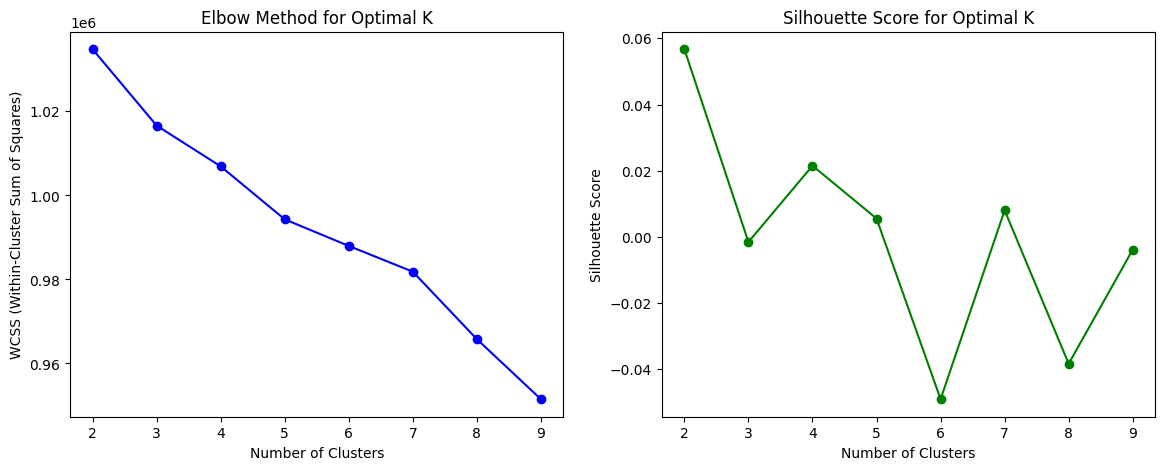

In [41]:
wcss =[]
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    silhouette_scores.append(silhouette_score(df1, kmeans.labels_))

# Plot the elbow graph
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.show()


In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_df['Kmeans_cluster'] = kmeans.fit_predict(df1)

In [43]:
cleaned_df['Kmeans_cluster'].value_counts()

,count
Kmeans_cluster,
2,4842
0,339
1,25


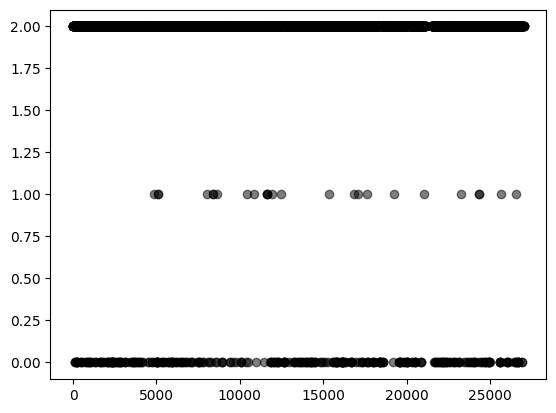

In [44]:
plt.plot(cleaned_df['Kmeans_cluster'], 'o', color='black', alpha=0.5)
plt.show()

In [45]:
# Reduce dimensions to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df1)

In [46]:
# Create a DataFrame with PCA results and cluster assignments
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])

In [47]:
pca_df = pca_df.reset_index(drop=True)  # drop=True discards the old index
cleaned_df = cleaned_df.reset_index(drop=True)

In [48]:
pca_df['Kmeans_Cluster'] = cleaned_df['Kmeans_cluster']

In [49]:
pca_df.isnull().any().sum()

0

In [50]:
pca_df.shape

(5206, 4)

In [51]:
pca_df.head(1)

,PCA1,PCA2,PCA3,Kmeans_Cluster
0,-0.489348,-2.208771,2.714579,2


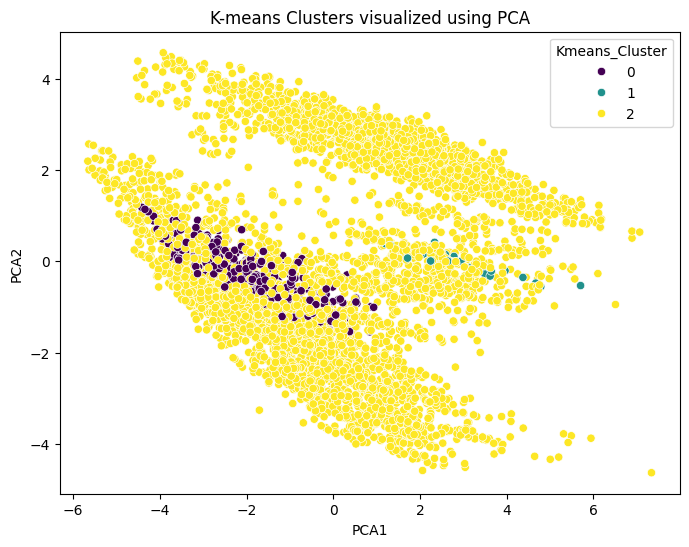

In [52]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Kmeans_Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clusters visualized using PCA')
plt.show()

In [53]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3',
                     color='Kmeans_Cluster',  # Color points by cluster
                     title='K-means Clusters PCA-3D Visualization')
fig.show()

In [54]:
pca_df.groupby("Kmeans_Cluster")['Kmeans_Cluster'].count()

,Kmeans_Cluster
Kmeans_Cluster,
0,339
1,25
2,4842


In [55]:
cleaned_df

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,Regionname_Western Metropolitan,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.71800,144.87800,...,True,False,False,True,False,False,False,False,False,2
1,3,13.8,3.0,2.0,1.0,352.0,242.0,2015.0,-37.87000,144.82500,...,True,False,False,False,False,False,False,True,False,2
2,3,11.1,3.0,1.0,2.0,533.0,117.0,1970.0,-37.82910,144.83500,...,True,False,False,False,False,False,False,False,False,2
3,3,10.5,3.0,1.0,1.0,593.0,118.0,1970.0,-37.76770,144.86740,...,True,False,False,False,False,False,False,False,False,2
4,4,6.6,3.0,2.0,1.0,244.0,180.0,1900.0,-37.86680,144.99280,...,False,False,False,False,False,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,3,11.2,3.0,1.0,2.0,197.0,96.0,2003.0,-37.70489,144.91033,...,False,False,False,False,True,False,False,False,False,2
5202,3,16.1,3.0,2.0,2.0,1036.0,132.0,1954.0,-37.69538,145.11543,...,False,False,False,False,False,False,False,False,False,2
5203,5,16.1,4.0,3.0,2.0,789.0,290.0,1980.0,-37.69817,145.12852,...,False,False,False,False,False,False,True,False,False,2
5204,4,16.1,4.0,2.0,2.0,1070.0,190.0,1980.0,-37.69999,145.12790,...,False,False,True,False,False,False,False,False,False,2


In [56]:
# Calculate the silhouette score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df1, cleaned_df['Kmeans_cluster'])
print(f'Silhouette Score for PCA: {sil_score}')

Silhouette Score for PCA: -0.07198222815339586


In [57]:
#TSNE

In [58]:
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the dimensions of the data in 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df1)

In [59]:
#save as a dataframe
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = cleaned_df['Kmeans_cluster']  # Use the cluster labels from KMeans

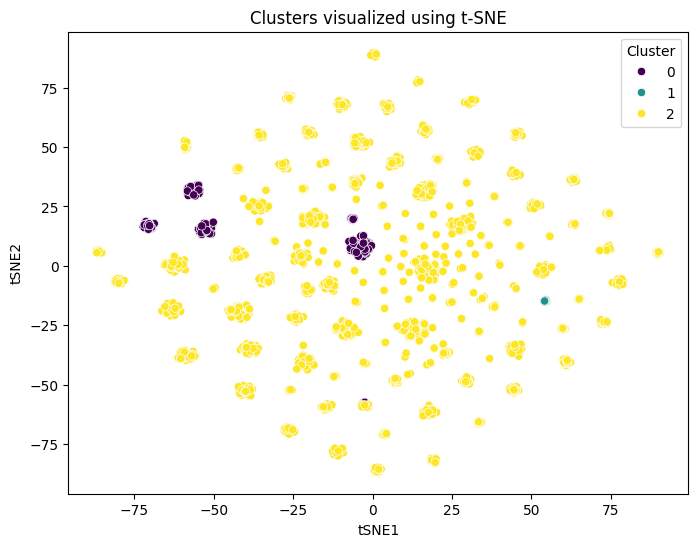

In [60]:
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('Clusters visualized using t-SNE')
plt.show()

In [61]:
df1.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground
0,-0.237280,0.452691,-0.211655,0.610026,-0.807115,-0.900586,1.495003,1.431668,0.955008,-1.088644,...,-0.605906,1.691750,0.0,-0.471847,2.194712,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
1,-0.237280,0.509990,-0.211655,0.610026,-0.807115,-0.664328,1.812567,1.404430,-0.861297,-1.577720,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,5.907914,-0.28457
2,-0.237280,-0.005698,-0.211655,-1.014422,0.572347,0.208380,-0.522463,0.178694,-0.372568,-1.485441,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
3,-0.237280,-0.120295,-0.211655,-1.014422,-0.807115,0.497675,-0.503782,0.178694,0.361124,-1.186459,...,-0.605906,1.691750,0.0,-0.471847,-0.455641,-0.438318,-0.254636,-0.390230,-0.169264,-0.28457
4,1.058923,-0.865177,-0.211655,0.610026,-0.807115,-1.185059,0.654393,-1.728007,-0.823059,-0.029286,...,1.650422,-0.591104,0.0,-0.471847,-0.455641,-0.438318,-0.254636,2.562589,-0.169264,-0.28457


In [62]:
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the dimensions of the data in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(df1)

In [63]:
# Create a DataFrame for visualization
tsne_df3d = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2', 'tSNE3'])
tsne_df3d['Cluster'] = cleaned_df['Kmeans_cluster']  # Use the cluster labels from KMeans

In [64]:
#save it to our cleaned dataset
cleaned_df['tsne_cluster'] = tsne_df3d['Cluster']
cleaned_df.head(1)

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster,tsne_cluster
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.718,144.878,...,False,False,True,False,False,False,False,False,2,2


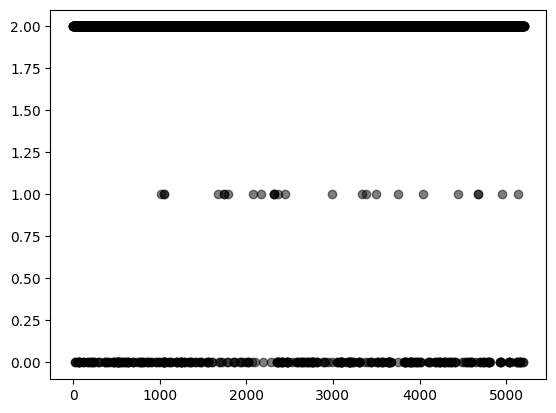

In [65]:
plt.plot(tsne_df['Cluster'], 'o', color='black', alpha=0.5)
plt.show()

In [66]:
import plotly.express as px
fig = px.scatter_3d(tsne_df3d, x='tSNE1', y='tSNE2', z='tSNE3',
                     color='Cluster',  # Color points by cluster
                     title='3D t-SNE Visualization')
fig.show()

*DBSCAN**

In [67]:
eps = np.linspace(0.01, 1 , num=20)
minSample = np.arange(2, 25, step =2)
combinations = list(itertools.product(eps, minSample))

def GrideSearch(combinations, X):
  scores =[]
  all_labels = []
  for i, (eps, min_samples) in enumerate(combinations):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    if (num_clusters <2) or (num_clusters > 25):
      scores.append(-20)
      all_labels.append("poor")
      print("at iteration:", i, "eps:", eps, "min_sample:", min_samples,"number_cluser:", num_clusters, "moving ..")
      continue
    scores.append(shs(X, labels))
    all_labels.append(labels)
    print("at iteration:", i, "Score:", scores[-1], "number_cluser:", num_clusters)
  best_index = np.argmax(scores)
  best_parameter = combinations[best_index]
  best_label = all_labels[best_index]
  best_score = scores[best_index]
  return ("best_epsilon:", best_parameter[0],"best_min:", best_parameter[1],"best_labels:", best_label, "best_score", best_score)

In [68]:
best_parameter = GrideSearch(combinations, df1)

at iteration: 0 eps: 0.01 min_sample: 2 number_cluser: 1 moving ..
at iteration: 1 eps: 0.01 min_sample: 4 number_cluser: 0 moving ..
at iteration: 2 eps: 0.01 min_sample: 6 number_cluser: 0 moving ..
at iteration: 3 eps: 0.01 min_sample: 8 number_cluser: 0 moving ..
at iteration: 4 eps: 0.01 min_sample: 10 number_cluser: 0 moving ..
at iteration: 5 eps: 0.01 min_sample: 12 number_cluser: 0 moving ..
at iteration: 6 eps: 0.01 min_sample: 14 number_cluser: 0 moving ..
at iteration: 7 eps: 0.01 min_sample: 16 number_cluser: 0 moving ..
at iteration: 8 eps: 0.01 min_sample: 18 number_cluser: 0 moving ..
at iteration: 9 eps: 0.01 min_sample: 20 number_cluser: 0 moving ..
at iteration: 10 eps: 0.01 min_sample: 22 number_cluser: 0 moving ..
at iteration: 11 eps: 0.01 min_sample: 24 number_cluser: 0 moving ..
at iteration: 12 Score: -0.16319385017452107 number_cluser: 2
at iteration: 13 eps: 0.06210526315789474 min_sample: 4 number_cluser: 0 moving ..
at iteration: 14 eps: 0.06210526315789474

In [69]:
print(best_parameter)

('best_epsilon:', 0.5831578947368421, 'best_min:', 4, 'best_labels:', array([-1, -1, -1, ..., -1, -1, -1]), 'best_score', -0.13916044914655584)


In [78]:
# Perform DBSCAN clustering for cleaned dataset of our features
db = DBSCAN(eps=0.5831578947368421, min_samples=4, metric='euclidean')
cleaned_df['cluster_dbscan'] = db.fit_predict(df1)
print(cleaned_df['cluster_dbscan'].unique())

[-1  1  0]


In [79]:
cleaned_df['cluster_dbscan'].value_counts()

,count
cluster_dbscan,
-1,5198
1,4
0,4


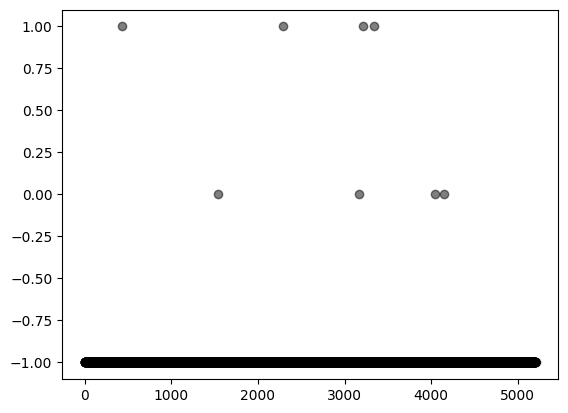

In [80]:
plt.plot(cleaned_df['cluster_dbscan'], 'o', color='black', alpha=0.5)
plt.show()

In [81]:
from sklearn.metrics import silhouette_score as shs
s= shs(df1, cleaned_df['cluster_dbscan'])
print("silhoutte_score DBSCAN: " ,s)

silhoutte_score DBSCAN:  -0.13916044914655584


In [82]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, )
svd_data = svd.fit_transform(df1)

In [83]:
reduced_data_cl3 = svd_data[:, :3]
svd_df3cl= pd.DataFrame(reduced_data_cl3, columns=['SVD1', 'SVD2', 'SVD3'])
svd_df3cl

,SVD1,SVD2,SVD3
0,-0.493972,-2.211594,2.687456
1,-0.027288,-1.598177,3.166327
2,-0.877851,-1.652915,2.748551
3,-1.130152,-2.052516,2.361787
4,-1.480768,3.793797,1.178534
...,...,...,...
5201,-1.922862,-1.535565,-2.271207
5202,1.245414,-1.344661,-2.114230
5203,3.314791,-1.740740,-1.447973
5204,2.444450,-1.680426,-1.875715


In [84]:
svd_df3cl['cluster_dbscan'] = cleaned_df['cluster_dbscan']

In [86]:
best_parameter = GrideSearch(combinations, svd_data)

at iteration: 0 Score: -0.2468972186217606 number_cluser: 2
at iteration: 1 eps: 0.01 min_sample: 4 number_cluser: 0 moving ..
at iteration: 2 eps: 0.01 min_sample: 6 number_cluser: 0 moving ..
at iteration: 3 eps: 0.01 min_sample: 8 number_cluser: 0 moving ..
at iteration: 4 eps: 0.01 min_sample: 10 number_cluser: 0 moving ..
at iteration: 5 eps: 0.01 min_sample: 12 number_cluser: 0 moving ..
at iteration: 6 eps: 0.01 min_sample: 14 number_cluser: 0 moving ..
at iteration: 7 eps: 0.01 min_sample: 16 number_cluser: 0 moving ..
at iteration: 8 eps: 0.01 min_sample: 18 number_cluser: 0 moving ..
at iteration: 9 eps: 0.01 min_sample: 20 number_cluser: 0 moving ..
at iteration: 10 eps: 0.01 min_sample: 22 number_cluser: 0 moving ..
at iteration: 11 eps: 0.01 min_sample: 24 number_cluser: 0 moving ..
at iteration: 12 eps: 0.06210526315789474 min_sample: 2 number_cluser: 399 moving ..
at iteration: 13 Score: -0.6179512642124699 number_cluser: 17
at iteration: 14 eps: 0.06210526315789474 min_

In [87]:
print(best_parameter)

('best_epsilon:', 0.5831578947368421, 'best_min:', 24, 'best_labels:', array([ 0,  0,  0, ..., -1, -1,  2]), 'best_score', 0.39340873445383107)


In [88]:
# Perform DBSCAN clustering
db = DBSCAN(eps=0.5831578947368421, min_samples=24, metric='euclidean')
svd_dbscan = db.fit_predict(svd_data)
svd_dbscan

array([ 0,  0,  0, ..., -1, -1,  2])

In [89]:
svd_df3cl['svd_dbscan'] = svd_dbscan
svd_df3cl['svd_dbscan'].unique()

array([ 0,  1,  2, -1])

In [90]:
svd_df3cl['svd_dbscan'].unique()

array([ 0,  1,  2, -1])

In [91]:
svd_df3cl.head()

,SVD1,SVD2,SVD3,cluster_dbscan,svd_dbscan
0,-0.493972,-2.211594,2.687456,-1,0
1,-0.027288,-1.598177,3.166327,-1,0
2,-0.877851,-1.652915,2.748551,-1,0
3,-1.130152,-2.052516,2.361787,-1,0
4,-1.480768,3.793797,1.178534,-1,1


In [93]:
svd_df3cl = svd_df3cl[svd_df3cl['svd_dbscan'] != -1]

In [94]:
cleaned_df['cluster_svd_dbscan'] = svd_df3cl['svd_dbscan']
cleaned_df.head(1)

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.718,144.878,...,True,False,False,False,False,False,2,2,-1,0.0


In [95]:
import plotly.express as px
fig = px.scatter_3d(svd_df3cl, x='SVD1', y='SVD2', z='SVD3',
                     color='svd_dbscan',  # Color points by cluster
                     title='SVD-DBSCAN, svd_dbscan Visualization')
fig.show()

In [96]:
def evaluate_clusters(data, labels, method):
    if len(set(labels)) > 1:
        sil = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        chi = calinski_harabasz_score(data, labels)
    else:
        sil, dbi, chi = -1, -1, -1  # Invalid clustering
    print(f"{method} -> Silhouette: {sil:.3f}, DBI: {dbi:.3f}, CHI: {chi:.3f}")


In [97]:
pca_df.head()

,PCA1,PCA2,PCA3,Kmeans_Cluster
0,-0.489348,-2.208771,2.714579,2
1,-0.031155,-1.577365,3.208558,2
2,-0.881094,-1.632277,2.773954,2
3,-1.118957,-2.048674,2.355561,2
4,-1.498995,3.802234,1.193868,2


In [98]:
evaluate_clusters(df1, cleaned_df['Kmeans_cluster'] , "K-Means")
evaluate_clusters(df1, cleaned_df['cluster_dbscan'] , "DBSCAN")
evaluate_clusters(svd_data, svd_dbscan , "SVD-DBSCAN")
evaluate_clusters(tsne_components, tsne_df['Cluster'] , "t-SNE")
evaluate_clusters(pca_components, pca_df['Kmeans_Cluster'] , "PCA")

K-Means -> Silhouette: -0.072, DBI: 2.657, CHI: 51.399
DBSCAN -> Silhouette: -0.139, DBI: 1.305, CHI: 2.303
SVD-DBSCAN -> Silhouette: 0.393, DBI: 2.386, CHI: 1879.541
t-SNE -> Silhouette: -0.024, DBI: 1.231, CHI: 163.659
PCA -> Silhouette: -0.135, DBI: 1.348, CHI: 156.072


In [99]:
feature_df = cleaned_df.iloc[:, :12]
feature_df

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,price
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.71800,144.87800,3464.0,2772.277228
1,3,13.8,3.0,2.0,1.0,352.0,242.0,2015.0,-37.87000,144.82500,5301.0,1477.272727
2,3,11.1,3.0,1.0,2.0,533.0,117.0,1970.0,-37.82910,144.83500,5132.0,1465.290807
3,3,10.5,3.0,1.0,1.0,593.0,118.0,1970.0,-37.76770,144.86740,4502.0,1433.389545
4,4,6.6,3.0,2.0,1.0,244.0,180.0,1900.0,-37.86680,144.99280,2952.0,7454.918033
...,...,...,...,...,...,...,...,...,...,...,...,...
5201,3,11.2,3.0,1.0,2.0,197.0,96.0,2003.0,-37.70489,144.91033,8870.0,2598.984772
5202,3,16.1,3.0,2.0,2.0,1036.0,132.0,1954.0,-37.69538,145.11543,8524.0,863.899614
5203,5,16.1,4.0,3.0,2.0,789.0,290.0,1980.0,-37.69817,145.12852,8524.0,1115.335868
5204,4,16.1,4.0,2.0,2.0,1070.0,190.0,1980.0,-37.69999,145.12790,8524.0,864.485981


In [100]:
cleaned_df

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.71800,144.87800,...,True,False,False,False,False,False,2,2,-1,0.0
1,3,13.8,3.0,2.0,1.0,352.0,242.0,2015.0,-37.87000,144.82500,...,False,False,False,False,True,False,2,2,-1,0.0
2,3,11.1,3.0,1.0,2.0,533.0,117.0,1970.0,-37.82910,144.83500,...,False,False,False,False,False,False,2,2,-1,0.0
3,3,10.5,3.0,1.0,1.0,593.0,118.0,1970.0,-37.76770,144.86740,...,False,False,False,False,False,False,2,2,-1,0.0
4,4,6.6,3.0,2.0,1.0,244.0,180.0,1900.0,-37.86680,144.99280,...,False,False,False,True,False,False,2,2,-1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,3,11.2,3.0,1.0,2.0,197.0,96.0,2003.0,-37.70489,144.91033,...,False,True,False,False,False,False,2,2,-1,2.0
5202,3,16.1,3.0,2.0,2.0,1036.0,132.0,1954.0,-37.69538,145.11543,...,False,False,False,False,False,False,2,2,-1,2.0
5203,5,16.1,4.0,3.0,2.0,789.0,290.0,1980.0,-37.69817,145.12852,...,False,False,False,True,False,False,2,2,-1,NaN
5204,4,16.1,4.0,2.0,2.0,1070.0,190.0,1980.0,-37.69999,145.12790,...,False,False,False,False,False,False,2,2,-1,NaN


In [101]:
cleaned_df.iloc[:, 257:261]

,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,2,-1,0.0
1,2,-1,0.0
2,2,-1,0.0
3,2,-1,0.0
4,2,-1,1.0
...,...,...,...
5201,2,-1,2.0
5202,2,-1,2.0
5203,2,-1,NaN
5204,2,-1,NaN


In [104]:
feature_df[['cluster_kmeans', 'cluster_tsne', 'cluster_dbscan', 'cluster_svd_dbscan']] = cleaned_df.iloc[:, 256:261]

In [105]:
feature_df.columns

Index(['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount',
       'price', 'cluster_kmeans', 'cluster_tsne', 'cluster_dbscan',
       'cluster_svd_dbscan'],
      dtype='object')

In [109]:
feature_col = ['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount',
       'price', 'cluster_kmeans', 'cluster_tsne', 'cluster_dbscan',
       'cluster_svd_dbscan']

In [110]:
feature_for_cluster = feature_df.groupby("cluster_kmeans")[feature_col].mean()
feature_for_cluster

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,price,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_kmeans,,,,,,,,,,,,,,,,
0,2.961652,7.184071,2.938053,1.380531,1.471976,408.713691,125.474808,1947.528024,-37.751289,144.991807,10097.477876,3115.471251,0.0,0.0,-1.000000,2.00000
1,3.400000,21.300000,3.400000,1.600000,1.640000,638.072860,139.400000,1975.200000,-37.820509,145.247756,4088.240000,1634.894542,1.0,1.0,-1.000000,2.00000
2,3.197439,11.353573,3.178232,1.641677,1.592730,494.692090,146.362296,1964.492978,-37.801069,144.994965,6512.435564,2731.813817,2.0,2.0,-0.997522,1.07682


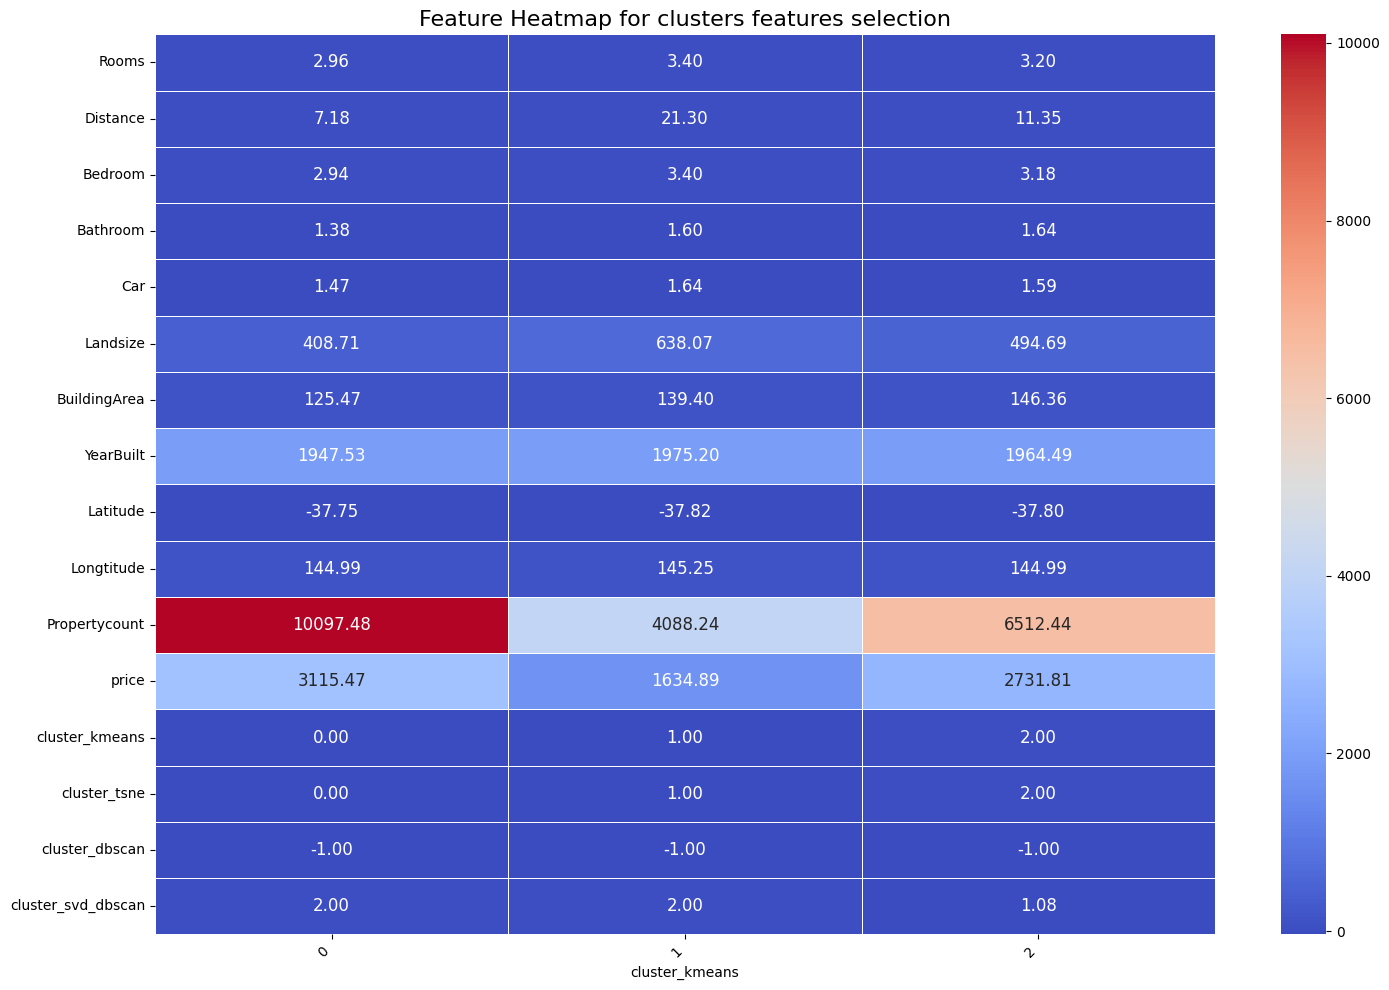

In [111]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [112]:
feature_for_cluster_tnse = feature_df.groupby("cluster_tsne")[feature_col].mean()
feature_for_cluster_tnse

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,price,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_tsne,,,,,,,,,,,,,,,,
0,2.961652,7.184071,2.938053,1.380531,1.471976,408.713691,125.474808,1947.528024,-37.751289,144.991807,10097.477876,3115.471251,0.0,0.0,-1.000000,2.00000
1,3.400000,21.300000,3.400000,1.600000,1.640000,638.072860,139.400000,1975.200000,-37.820509,145.247756,4088.240000,1634.894542,1.0,1.0,-1.000000,2.00000
2,3.197439,11.353573,3.178232,1.641677,1.592730,494.692090,146.362296,1964.492978,-37.801069,144.994965,6512.435564,2731.813817,2.0,2.0,-0.997522,1.07682


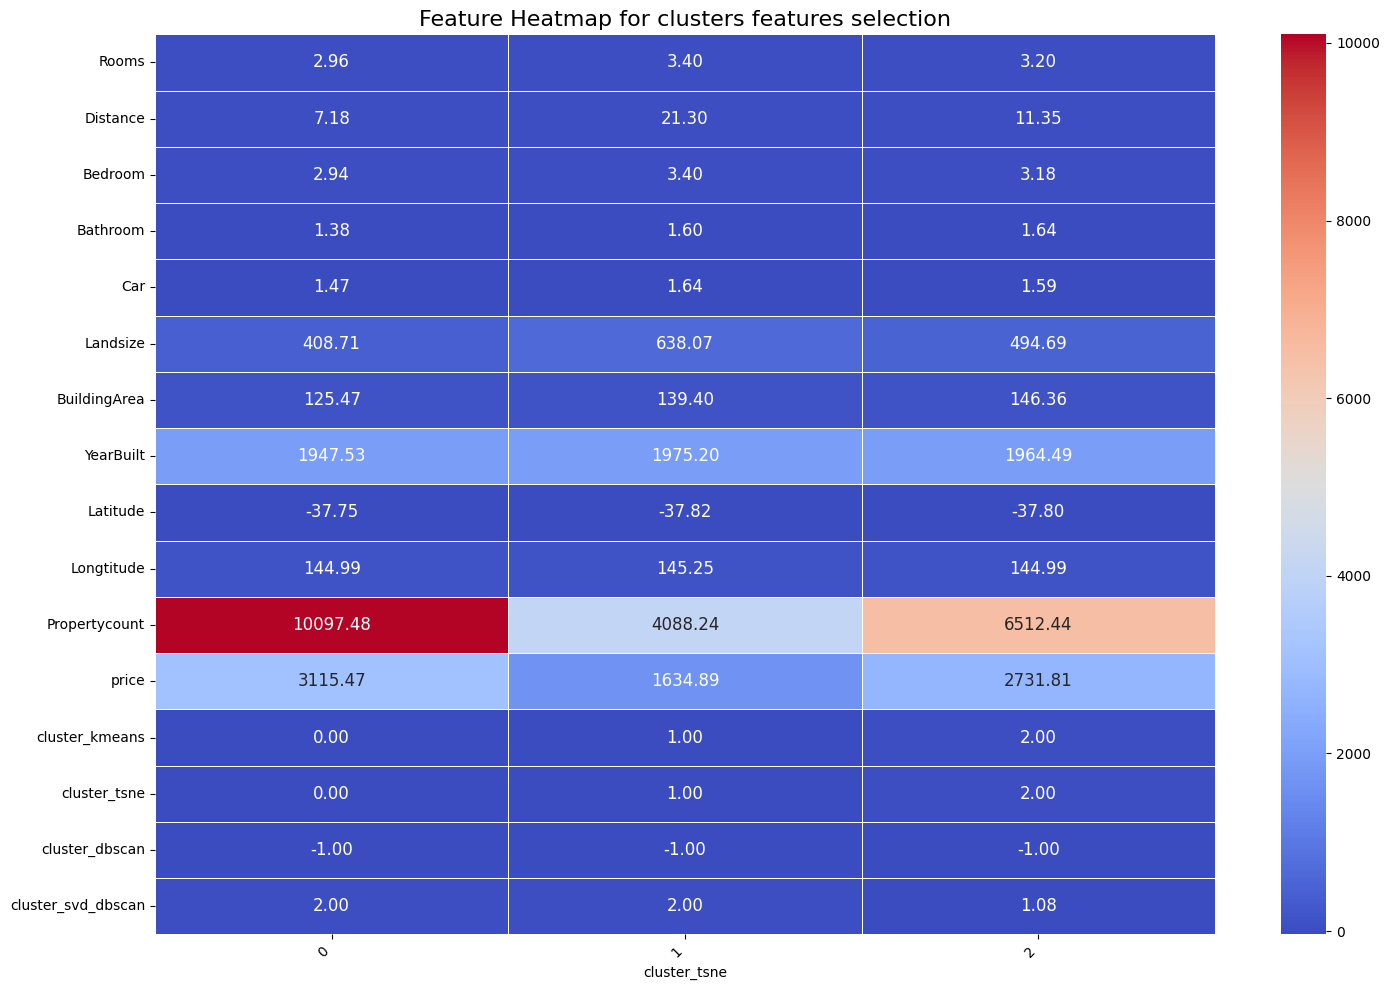

In [113]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_tnse.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [114]:
feature_for_cluster_dbscan = feature_df.groupby("cluster_dbscan")[feature_col].mean()
feature_for_cluster_dbscan

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,price,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_dbscan,,,,,,,,,,,,,,,,
-1,3.18334,11.12878,3.163909,1.625433,1.584456,489.595919,145.044285,1963.448057,-37.798053,144.995997,6741.520392,2754.217538,1.864756,1.864756,-1.0,1.143567
0,3.00000,9.37500,3.000000,1.000000,2.000000,599.568459,96.750000,1954.750000,-37.742650,145.045580,2810.500000,1271.888969,2.000000,2.000000,0.0,2.000000
1,3.00000,14.25000,3.000000,1.000000,2.000000,621.750000,95.000000,1961.250000,-37.682385,144.916517,1199.750000,737.325353,2.000000,2.000000,1.0,2.000000


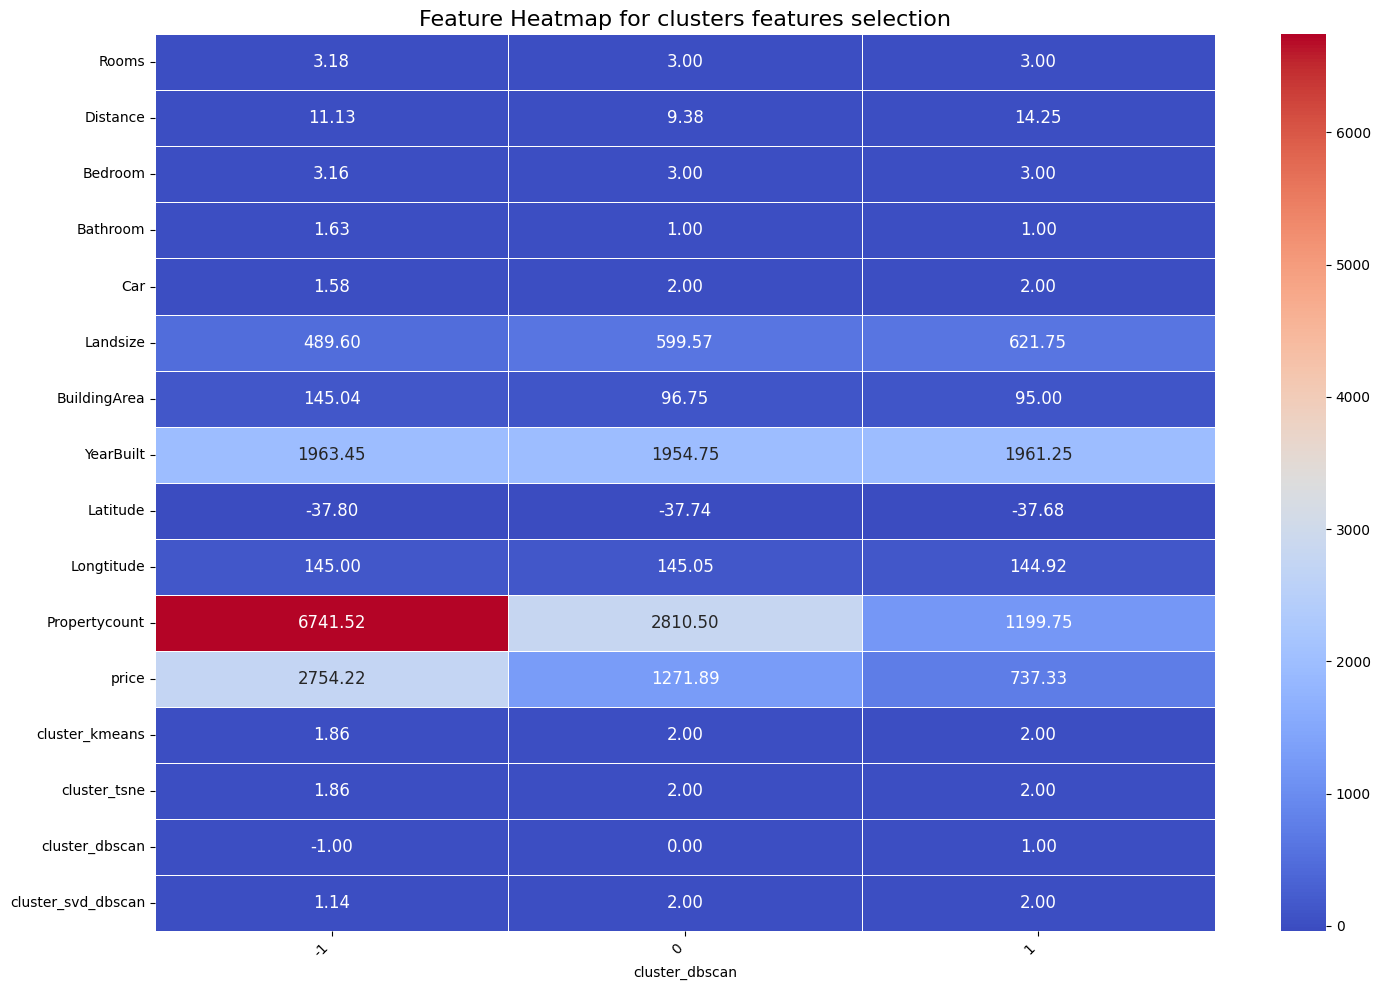

In [115]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_dbscan.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [116]:
feature_for_cluster_svd_dbscan = feature_df.groupby("cluster_svd_dbscan")[feature_col].mean()
feature_for_cluster_svd_dbscan

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,price,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_svd_dbscan,,,,,,,,,,,,,,,,
0.0,3.176110,9.708576,3.144717,1.599541,1.569678,452.138858,143.719847,1966.707504,-37.783772,144.860807,5454.703675,2493.468780,2.000000,2.000000,-1.000000,0.0
1.0,3.272668,11.173850,3.256242,1.762812,1.699737,520.547575,157.843854,1958.335742,-37.884638,145.059414,7033.228647,3278.875396,2.000000,2.000000,-1.000000,1.0
2.0,3.096163,11.344145,3.081216,1.511709,1.520179,486.807510,134.579188,1963.945192,-37.740067,145.022037,7236.185850,2525.683920,1.653214,1.653214,-0.994021,2.0


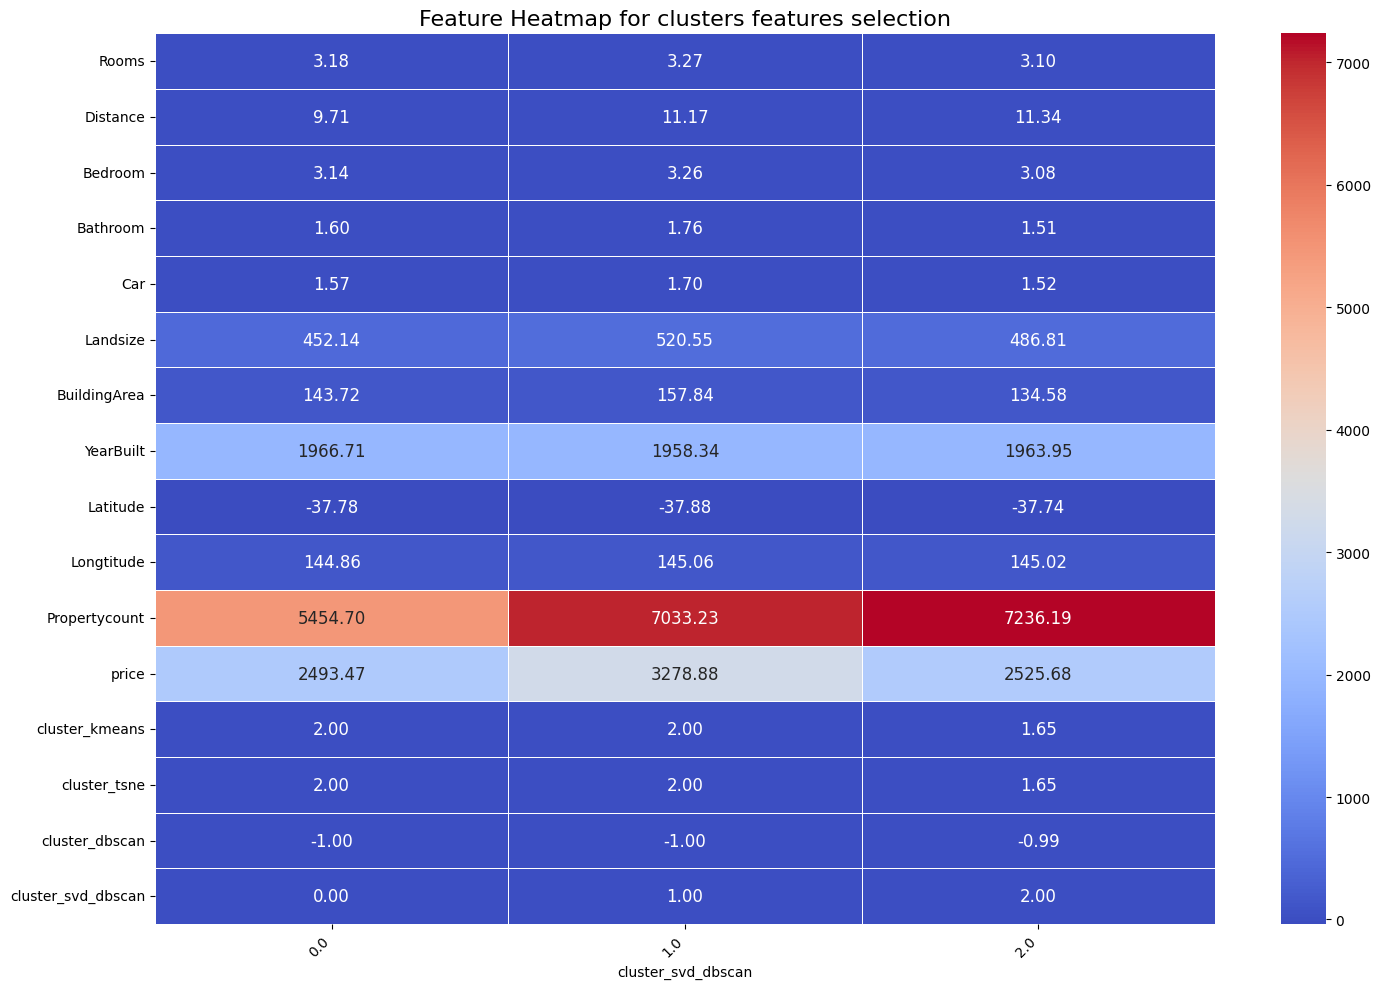

In [117]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_svd_dbscan.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [120]:
cleaned_df.head(1)

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,3,13.5,3.0,2.0,1.0,303.0,225.0,2016.0,-37.718,144.878,...,True,False,False,False,False,False,2,2,-1,0.0


In [123]:
all_feature_for_cluster_svd_dbscan = cleaned_df.groupby("cluster_svd_dbscan")[cleaned_df.columns].mean()
all_feature_for_cluster_svd_dbscan

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,...,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Kmeans_cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
cluster_svd_dbscan,,,,,,,,,,,,,,,,,,,,,
0.0,3.176110,9.708576,3.144717,1.599541,1.569678,452.138858,143.719847,1966.707504,-37.783772,144.860807,...,0.176876,0.165391,0.053599,0.122511,0.027565,0.074273,2.000000,2.000000,-1.000000,0.0
1.0,3.272668,11.173850,3.256242,1.762812,1.699737,520.547575,157.843854,1958.335742,-37.884638,145.059414,...,0.185940,0.153088,0.067017,0.122208,0.028252,0.076216,2.000000,2.000000,-1.000000,1.0
2.0,3.096163,11.344145,3.081216,1.511709,1.520179,486.807510,134.579188,1963.945192,-37.740067,145.022037,...,0.162930,0.162930,0.056801,0.147982,0.024415,0.077230,1.653214,1.653214,-0.994021,2.0


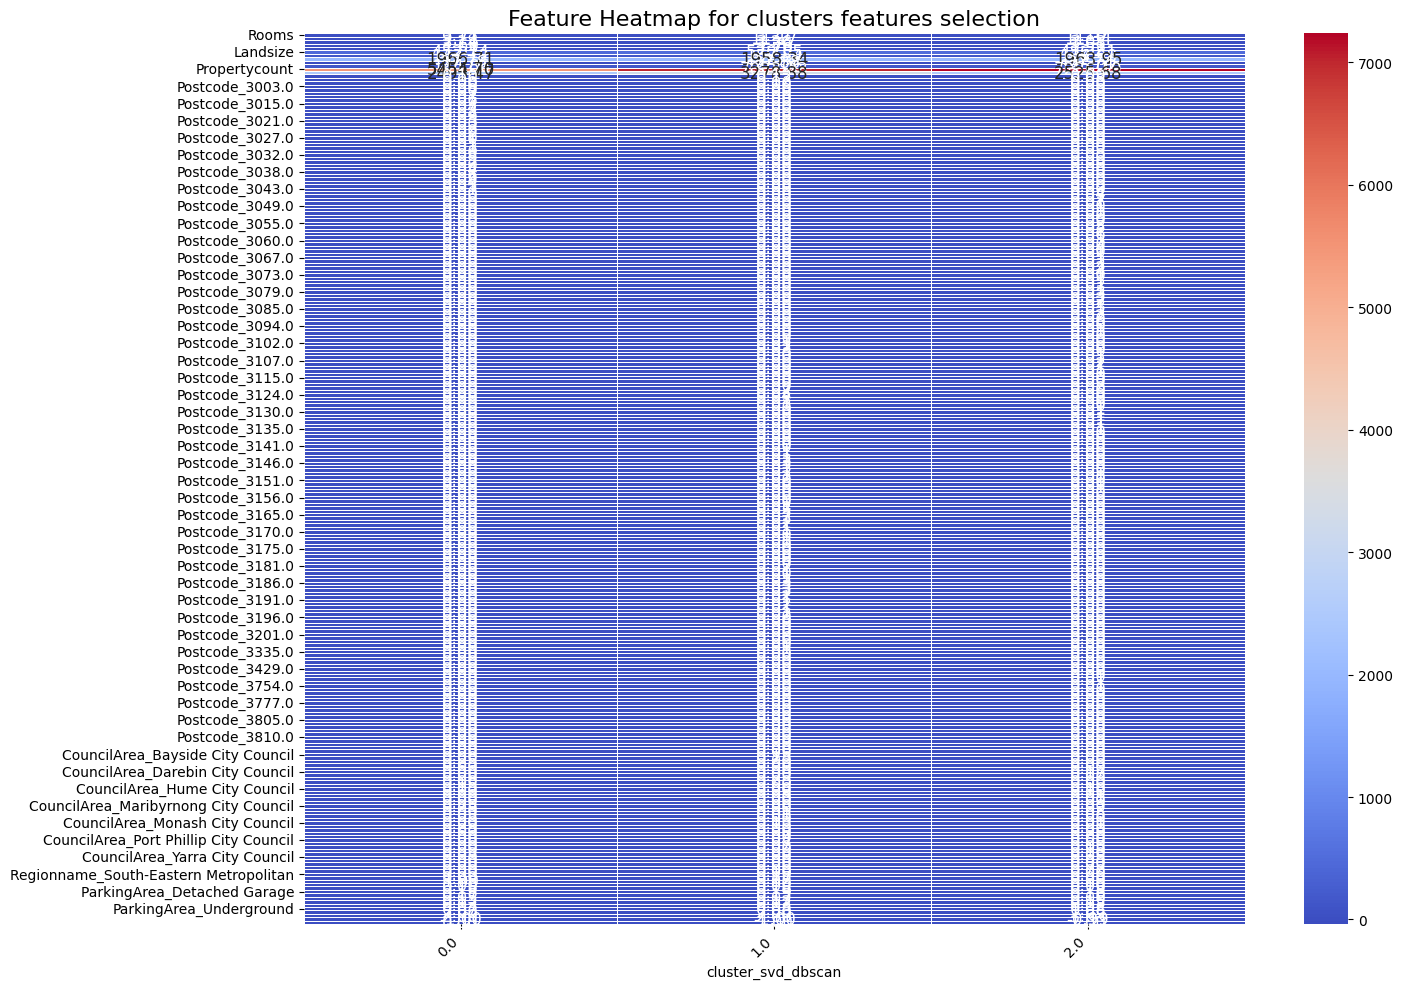

In [124]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(all_feature_for_cluster_svd_dbscan.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [125]:
cleaned_df.to_csv("new_melbourne_postcode.csv", index=False)

**Comparison between models**